In [1]:
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
train_dataset_dir = "dataset/train/"
test_dataset_dir = "dataset/test/test/"

train_dataset_csv = pd.read_csv(train_dataset_dir + "train_data.csv")
test_dataset_csv = pd.read_csv(test_dataset_dir + "test_data.csv")

In [3]:
dataset = []
dataset_label = []

for file in train_dataset_csv['filen_name']:
    image_array = np.array(Image.open(train_dataset_dir + file))
    dataset.append(image_array)
    
for label in train_dataset_csv['label']:
    dataset_label.append(label)

In [4]:
dataset = np.array(dataset)
dataset_label = np.array(dataset_label)

In [5]:
dataset = dataset/255.
dataset = dataset.reshape(-1, dataset.shape[1], dataset.shape[2], 1)

In [6]:
test_dataset = []
for test_file in test_dataset_csv['file_name']:
    image_array = np.array(Image.open(test_dataset_dir + test_file))
    test_dataset.append(image_array)
    
test_dataset = np.array(test_dataset)

In [7]:
test_dataset = test_dataset/255.
test_datset = test_dataset.reshape(-1, test_dataset.shape[1], test_dataset.shape[2], 1)

In [9]:
from sklearn.model_selection import train_test_split

train_dataset, validation_dataset, train_dataset_label, validation_dataset_label = train_test_split(dataset, dataset_label, test_size = 0.2, stratify = dataset_label)

In [10]:
dataset_dir = "./dataset/"

np.save(dataset_dir + "train_dataset.npy", train_dataset)
np.save(dataset_dir + "train_dataset_label.npy", train_dataset_label)

np.save(dataset_dir + "validation_dataset.npy", validation_dataset)
np.save(dataset_dir + "validation_dataset_label.npy", validation_dataset_label)

np.save(dataset_dir + "test_dataset.npy", test_dataset)

In [11]:
dataset_loadtest = np.load(dataset_dir + "train_dataset.npy")

In [12]:
import matplotlib.pyplot as plt

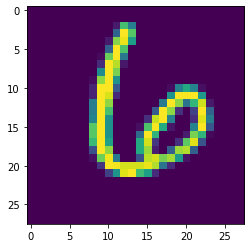

In [13]:
plt.imshow(dataset_loadtest[0])